
---


In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
my_filepath = '../input/electricity-production-by-source-world/Electricity_Production_By_Source.csv'
energy_data = pd.read_csv(my_filepath , index_col = 'Year')
del energy_data['Code']
energy_data = energy_data.rename(columns = {'Entity':'Country'})


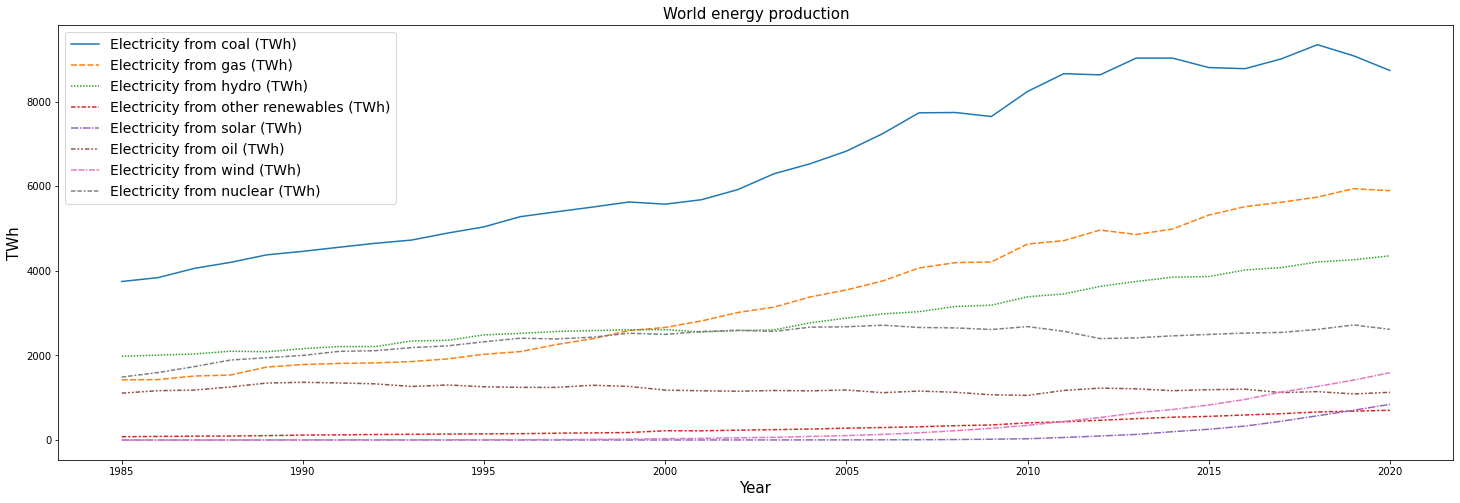

In [3]:
country = 'World'
plot_data = energy_data.loc[energy_data['Country'] == country]
plt.figure(figsize=(25,8))
plt.title(country + " energy production", size = 15)
sns.lineplot(data = plot_data)
plt.ylabel("TWh" , size = 15)
plt.xlabel("Year", size = 15)
plt.legend(fontsize = 14)

In [4]:
column_names = list(energy_data)
del column_names[0]

In [5]:
energy_data = energy_data.groupby("Country").last()
country_data = energy_data.loc[energy_data.index == 'Spain']



In [6]:
energy_data['Max energy production source'] = energy_data[column_names].idxmax(axis = 1)

In [7]:
import plotly.express as px  

fig = px.choropleth(energy_data,  # Input Pandas DataFrame
                    locations = energy_data.index , # DataFrame column with locations
                    color = "Max energy production source",  # DataFrame column with color values
                    locationmode = 'country names')  
                                         
fig.update_layout(title_text = 'Max energy production source from dataset\'s most recent year in each country', geo_scope = 'world')  # Plot only the USA instead of globe
fig.show()  # Output the plot to the screen